In [107]:
import peptides
import Bio.SeqUtils as BioUtils
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import numpy as np

Here examples of peptides/epitopes from VDJdb:

- FLKEKGGL
- LQPFPQPELPYPQPQ
- LLQTGIHVRVSQPSL
- EHPTFTSQYRIQGKL

[Documentation](https://pypi.org/project/peptides/)

In [76]:
peptide1_Peptide = peptides.Peptide("FLKEKGGL")
peptide2_Peptide = peptides.Peptide("LQPFPQPELPYPQPQ")
peptide3_Peptide = peptides.Peptide("LLQTGIHVRVSQPSL")
peptide4_Peptide = peptides.Peptide("EHPTFTSQYRIQGKL")

list_peptides_Peptide = [peptide1_Peptide, peptide2_Peptide, peptide3_Peptide, peptide4_Peptide]

In [77]:
peptide1_Biopython = Seq("FLKEKGGL")
peptide2_Biopython = Seq("LQPFPQPELPYPQPQ")
peptide3_Biopython = Seq("LLQTGIHVRVSQPSL")
peptide4_Biopython = Seq("EHPTFTSQYRIQGKL")

list_peptides_Biopython = [peptide1_Biopython, peptide2_Biopython, peptide3_Biopython, peptide4_Biopython]

[ImRex](https://www.biorxiv.org/content/10.1101/2019.12.18.880146v2.full) used: 
- mass, 
- hydrophobicity,
- hydrophilicity, 
- isoelectric point

Calcualted w/ [biopython](https://biopython.org/wiki/Download)

They then used a so-called "interaction map" where they computed the dot-product of 

In [78]:
# Biopython 
# molecular mass of the amino acid complex
for i, peptide in enumerate(list_peptides_Biopython): 
    print(f"peptide{i}: {BioUtils.molecular_weight(peptide, "protein")}")

peptide0: 891.0654999999999
peptide1: 1778.9995
peptide2: 1647.9161
peptide3: 1804.9988000000003


In [79]:
# Peptides
# molecular mass of the amino acid complex
for i, peptide in enumerate(list_peptides_Peptide): 
    print(f"peptide{i}: {peptide.molecular_weight()}")

peptide0: 891.0781400000001
peptide1: 1779.0251399999997
peptide2: 1647.9381399999997
peptide3: 1805.0232399999998


**Same result if Biopython or Peptides!**

In [80]:
# Biopython
# Hydrophobicity: if positive => hydrophobic, if negative => hydrophilic
for i, peptide in enumerate(list_peptides_Biopython): 
    print(f"peptide{i}: {ProteinAnalysis(peptide).gravy()}")

peptide0: -0.21250000000000005
peptide1: -1.2
peptide2: 0.35333333333333333
peptide3: -1.1


In [81]:
# Peptides
# Hydrophobicity: if positive => hydrophobic, if negative => hydrophilic
for i, peptide in enumerate(list_peptides_Peptide): 
    print(f"peptide{i}: {peptide.hydrophobicity()}")

peptide0: -0.21250000000000008
peptide1: -1.2
peptide2: 0.3533333333333333
peptide3: -1.0999999999999999


**Same result if Biopython or Peptides!**

In [82]:
# Biopython
# Isoelectric Point
for i, peptide in enumerate(list_peptides_Biopython): 
    print(f"peptide{i}: {ProteinAnalysis(peptide).isoelectric_point()}")

peptide0: 8.591073036193851
peptide1: 4.0500284194946286
peptide2: 9.756532478332517
peptide3: 8.692417335510253


In [83]:
# Peptides
# Isoelectric Point
for i, peptide in enumerate(list_peptides_Peptide): 
    print(f"peptide{i}: {peptide.isoelectric_point()}")

peptide0: 9.53730092663318
peptide1: 3.8499827128835022
peptide2: 10.551758703775704
peptide3: 9.299755305983126


<span style="color:red">**The results are different!!!**</span>

In [84]:
# Dictionary to hold the peptide dictionaries
peptide_dicts = {}

# Iterate through each peptide, create a dictionary for each, and populate it with descriptors
for i, peptide in enumerate(list_peptides_Peptide):
    peptide_dict_name = f"peptide{i}_dict"
    peptide_dicts[peptide_dict_name] = peptide.descriptors()

In [85]:
peptide_dicts["peptide0_dict"]

{'BLOSUM1': 0.12749999999999995,
 'BLOSUM2': -0.02749999999999999,
 'BLOSUM3': -0.11000000000000004,
 'BLOSUM4': -0.2,
 'BLOSUM5': -0.028750000000000026,
 'BLOSUM6': 0.43375,
 'BLOSUM7': 0.25375000000000003,
 'BLOSUM8': 0.345,
 'BLOSUM9': 0.0875,
 'BLOSUM10': -0.28125,
 'PP1': -0.28375,
 'PP2': -0.22500000000000003,
 'PP3': 0.11625,
 'F1': -0.11074999999999997,
 'F2': 0.08037500000000003,
 'F3': -0.04512499999999997,
 'F4': 0.889875,
 'F5': -0.1325,
 'F6': -0.19724999999999995,
 'KF1': -0.18750000000000003,
 'KF2': -0.13875,
 'KF3': -0.42125,
 'KF4': 0.07749999999999999,
 'KF5': 0.13624999999999998,
 'KF6': -0.99625,
 'KF7': 0.94625,
 'KF8': 0.565,
 'KF9': -0.25249999999999995,
 'KF10': 0.4275,
 'MSWHIM1': -0.265,
 'MSWHIM2': 0.18749999999999997,
 'MSWHIM3': -0.125,
 'E1': 0.034999999999999976,
 'E2': 0.02237500000000002,
 'E3': -0.113625,
 'E4': -0.12587500000000001,
 'E5': 0.135125,
 'PD1': -0.35250000000000004,
 'PD2': -0.06375000000000003,
 'ProtFP1': -1.0250000000000004,
 'ProtFP2

------------------------------------------------------------------------------------------------------

**ImRex**

In the following we try to reproduce the so-claled "interaction maps" of the ImRex paper. Therefore, we can use the above gained experience with Biopython, as they implemented their physicochemical properties using the Biopython package.

Citate form the paper: 

"In our experiments, the interaction map for each CDR3-epitope pair was constructed as follows. First, each sequence in the pair was converted into a vector of physicochemical property values of each amino acid. Next, a matrix was computed that contained the pairwise absolute differences between the elements of the two vectors. One such twodimensional matrix was created for each of the following physicochemical properties: hydrophobicity, hydrophilicity, mass and isoelectric point (29). Every element in the matrix was then scaled between zero and one, based on the minimum and maximum possible values of each property. Next, the matrices were zero-padded on both sides to a dimension of 20 × 11 (CDR3 × epitope)."

For this examples we use data from the VDJdb, stored in our W&B cloud.

In [99]:
epitope1 = Seq("LLWNGPMAV")
epitope1_mass = []

cdr3_1 = "FYQEHDGSDSAC"
cdr3_1_mass = []

for amino_acid in cdr3_1:
    mass = BioUtils.molecular_weight(amino_acid, "protein")
    cdr3_1_mass.append(mass)

print("OK") if len(cdr3_1) == len(cdr3_1_mass) else print("ERROR")
print(f"len of cdr3_mass: {len(cdr3_1_mass)}")
cdr3_1_mass

OK
len of cdr3_mass: 12


[165.1891,
 181.1885,
 146.1445,
 147.1293,
 155.1546,
 133.1027,
 75.0666,
 105.0926,
 133.1027,
 105.0926,
 89.0932,
 121.1582]

In [100]:
for amino_acid in epitope1: 
    print(amino_acid)
    mass = BioUtils.molecular_weight(amino_acid, "protein")
    epitope1_mass.append(mass)

epitope1_mass

L
L
W
N
G
P
M
A
V


[131.1729,
 131.1729,
 204.2252,
 132.1179,
 75.0666,
 115.1305,
 149.2113,
 89.0932,
 117.1463]

In [101]:
epitope1_mass_np = np.array(epitope1_mass)
epitope1_mass_np.T

array([131.1729, 131.1729, 204.2252, 132.1179,  75.0666, 115.1305,
       149.2113,  89.0932, 117.1463])

In [113]:
cdr3_1_mass_np = np.array(cdr3_1_mass)
epitope1_mass_np = np.array(epitope1_mass)

difference_matrix = np.abs(cdr3_1_mass_np[:, np.newaxis] - epitope1_mass_np)
# print(f"difference_matrix: \n{difference_matrix}")
print(f"difference_matrix.shape: \n{difference_matrix.shape}")

min_value = np.min(difference_matrix)
max_value = np.max(difference_matrix)
scaled_difference_matrix = (difference_matrix - min_value) / (max_value - min_value)
# print(f"scaled_difference_matrix: \n{scaled_difference_matrix}")
print(f"scaled_difference_matrix.shape: \n{scaled_difference_matrix.shape}")

# Desired shape
desired_shape = (20, 11)

# Initialize a new matrix of zeros with the desired shape
padded_matrix = np.zeros(desired_shape)

# Calculate the number of zeros to add on each side horizontally
left_padding = (desired_shape[1] - scaled_difference_matrix.shape[1]) // 2
right_padding = desired_shape[1] - scaled_difference_matrix.shape[1] - left_padding

# Copy the scaled difference matrix into the center of the new zero matrix
padded_matrix[:scaled_difference_matrix.shape[0], left_padding:-right_padding] = scaled_difference_matrix

# If the right_padding is 0, the slicing index should not be negative; adjust for that case
if right_padding == 0:
    padded_matrix[:scaled_difference_matrix.shape[0], left_padding:] = scaled_difference_matrix

padded_matrix

difference_matrix.shape: 
(12, 9)
scaled_difference_matrix.shape: 
(12, 9)


array([[0.        , 0.26336767, 0.26336767, 0.30223384, 0.25605109,
        0.69776616, 0.38757466, 0.12370682, 0.58916634, 0.37196749,
        0.        ],
       [0.        , 0.38724173, 0.38724173, 0.17835978, 0.37992515,
        0.82164022, 0.51144871, 0.24758088, 0.7130404 , 0.49584155,
        0.        ],
       [0.        , 0.1159164 , 0.1159164 , 0.44968512, 0.10859981,
        0.55031488, 0.24012338, 0.02374445, 0.44171507, 0.22451621,
        0.        ],
       [0.        , 0.12354113, 0.12354113, 0.44206038, 0.11622455,
        0.55793962, 0.24774812, 0.01611972, 0.4493398 , 0.23214095,
        0.        ],
       [0.        , 0.18567637, 0.18567637, 0.37992515, 0.17835978,
        0.62007485, 0.30988335, 0.04601552, 0.51147504, 0.29427618,
        0.        ],
       [0.        , 0.01494132, 0.01494132, 0.5506602 , 0.00762473,
        0.4493398 , 0.1391483 , 0.12471953, 0.34073999, 0.12354113,
        0.        ],
       [0.        , 0.43439848, 0.43439848, 1.        , 0.

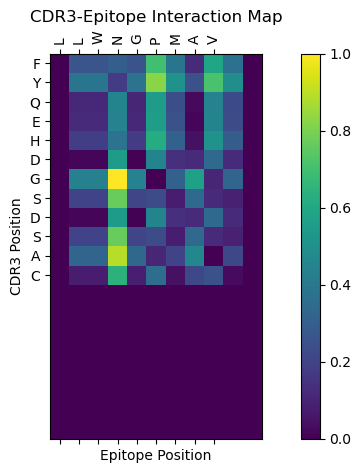

In [111]:
import matplotlib.pyplot as plt

# Assuming padded_matrix is the final matrix from your calculations
# and cdr3_1 and epitope1 are your sequences

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Assuming your matrix is already scaled and zero-padded
# This is your interaction map data
interaction_map = padded_matrix  # Replace with your actual data

# Plot the heatmap
cax = ax.matshow(interaction_map, cmap='viridis')

# Add colorbar to interpret the values
fig.colorbar(cax)

# Set the ticks to be at the middle of each cell
ax.set_xticks(np.arange(len(epitope1)))
ax.set_yticks(np.arange(len(cdr3_1)))

# Label the ticks with the respective amino acids
ax.set_xticklabels(list(epitope1))
ax.set_yticklabels(list(cdr3_1))

# Rotate the tick labels for the x-axis to display vertically
plt.xticks(rotation=90)

# Set labels (optional)
ax.set_xlabel('Epitope Position')
ax.set_ylabel('CDR3 Position')
ax.set_title('CDR3-Epitope Interaction Map')

plt.show()


------------------------------------------------------------------------------------------------------

***3D Structure Approach***

In the following investiagations about to implement the 3D structure is done.

In [90]:
from transformers import AutoModel, AutoTokenizer
import torch

In [91]:
model_name = "facebook/esmfold_v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

KeyboardInterrupt: 

In [ ]:
CDR3_1_Biopython = Seq("CASSYLPGQGDHYSNQPQHF")
CDR3_2_Biopython = Seq("CASGQVTLPTETQYF")
CDR3_3_Biopython = Seq("CSARDFYSTSGRVSAKNIQYF")
CDR3_4_Biopython = Seq("CSARAAYIGGAREQYF")

In [ ]:
sequence_1 = str(peptide1_Biopython)  
sequence_2 = str(CDR3_1_Biopython)   

tokens_1 = tokenizer(sequence_1, return_tensors="pt")
tokens_2 = tokenizer(sequence_2, return_tensors="pt")

with torch.no_grad():
    outputs_1 = model(**tokens_1)
    outputs_2 = model(**tokens_2)

embedding_1 = outputs_1.last_hidden_state
embedding_2 = outputs_2.last_hidden_state


In [ ]:
print(embedding_1.shape)
print(embedding_2.shape)

torch.Size([1, 10, 2560])
torch.Size([1, 22, 2560])


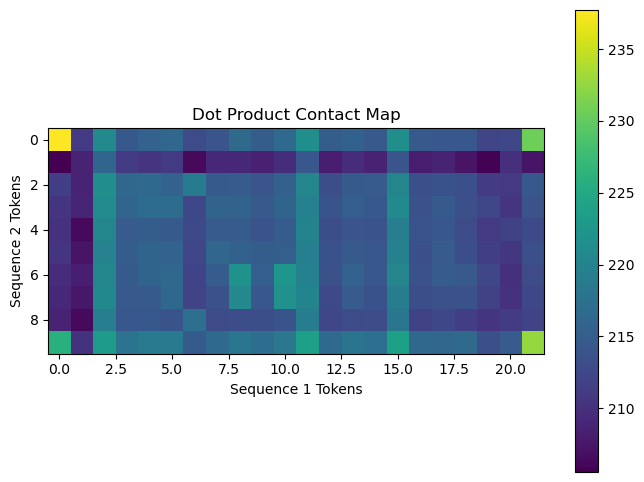

In [ ]:
import torch
import matplotlib.pyplot as plt

# Assuming embeddings1 has shape [1, 10, 2560] and embeddings2 has shape [1, 22, 2560]
# Remove batch dimension
embedding_1 = embedding_1.squeeze(0)  # Now shape [10, 2560]
embedding_2 = embedding_2.squeeze(0)  # Now shape [22, 2560]

# Compute the dot product contact map
# We transpose embeddings2 to align the feature dimensions for matrix multiplication
contact_map = torch.matmul(embedding_1, embedding_2.T)

# Convert the contact map to a NumPy array for plotting
contact_map = contact_map.cpu().numpy()

# Plot the contact map
plt.figure(figsize=(8, 6))
plt.imshow(contact_map, cmap='viridis', interpolation='nearest')
plt.xlabel('Sequence 1 Tokens')
plt.ylabel('Sequence 2 Tokens')
plt.title('Dot Product Contact Map')
plt.colorbar()
plt.show()


looks a bit weird... paper mentions this: 
"We padded the C-maps of small sized epitopes with 0’s, i.e., no-contacts. Finally, given that the C-maps are distance matrices and symmetric, the upper triangular is enough to keep all information, which for an AA sequence of size 𝓁 = 22, resulted in a 𝓁(𝓁 + 1)/2 = 253-long numeric vector."

In [ ]:
tokens = tokenizer(str(peptide2_Biopython), return_tensors="pt")
tokens

{'input_ids': tensor([[23, 10,  5, 14, 13, 14,  5, 14,  6, 10, 14, 18, 14,  5, 14,  5, 25]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

Tokenizer is doing for each char a sperate token. This is what we want!
<span style="color:red">**ATTENTION:**</span> the amount of tokens is always: number tokens = number chars + 2, this because Start-of-Sequence Token and End-of-Sequence Token